In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
#Generate(X,y ) dataSet with 100 lines and two features

In [2]:
(X,y)=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0) #dataset with 100 lignes 2 variabe 
y=y.reshape(y.shape[0],1)
print("dimension  de X",X.shape) #Verify X shape
print("dimension  de y",X.shape) #Verify Y shape

dimension  de X (100, 2)
dimension  de y (100, 2)


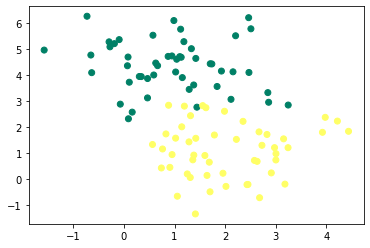

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()

In [4]:
#Initialize parameters W,b
def initialize(X):
  W=np.random.rand(X.shape[1],1)
  b=np.random.rand(1)
  return (W,b)




In [5]:
#Implement model
def model(X,W,b):
  Z=X.dot(W)+b
  A=1/(1+np.exp(-Z))
  return A

In [6]:
#Cost function
def log_loss(A,y):
  return 1/len(y) * np.sum(-y*np.log(A)-(1-y)*np.log2(1-A))


In [7]:
#calculate cost Gradients
def gradient_descent(A,X,y):
  dw=(1/len(y))*np.dot(X.T,A-y)
  db=(1/len(y))*np.sum(A-y)
  return (dw,db)



In [8]:
#Use gradients to update (W,b) to reduce the model error
def update(W,b,dw,db,learning_rate):
  W=W-learning_rate*dw
  b=b-learning_rate*db
  return (W,b)


In [9]:
def predict(X,W,b):
  A=model(X,W,b)
  print(A)
  return A>=0.5

In [10]:
#Implement Artificial neurone
def neurone(X,y,learning_rate=0.1,n_iter=100):
  W,b=initialize(X)
  loss=[] #empty list
  for i in range(n_iter):
      A = model(X,W,b)
      cost=log_loss(A,y)
      loss.append(cost)
      (dw,db)=gradient_descent(A,X,y)
      (W,b)=update(W,b,dw,db,learning_rate=0.1)
 
  y_pred=predict(X,W,b)
  print(accuracy_score(y,y_pred)) #Print accuracy
  plt.plot(loss)
  plt.show()
  return (W,b)



[[0.95387075]
 [0.8158967 ]
 [0.00670553]
 [0.18356649]
 [0.95837602]
 [0.36689744]
 [0.07456631]
 [0.93145391]
 [0.05456855]
 [0.89486121]
 [0.03462454]
 [0.89069309]
 [0.02511321]
 [0.02169224]
 [0.73683584]
 [0.97604286]
 [0.99051354]
 [0.04340672]
 [0.79171853]
 [0.68773183]
 [0.04564492]
 [0.04008309]
 [0.42273854]
 [0.00640942]
 [0.9515061 ]
 [0.03379249]
 [0.91362865]
 [0.00828882]
 [0.06412671]
 [0.73963317]
 [0.97951266]
 [0.04524646]
 [0.72741845]
 [0.97978782]
 [0.41786953]
 [0.21183873]
 [0.81228029]
 [0.55348221]
 [0.45891457]
 [0.53248286]
 [0.09130809]
 [0.05746002]
 [0.00110308]
 [0.17152261]
 [0.22651794]
 [0.84343121]
 [0.97068236]
 [0.96759565]
 [0.00638945]
 [0.0100401 ]
 [0.94617033]
 [0.6311444 ]
 [0.03466169]
 [0.03933898]
 [0.78469781]
 [0.04322855]
 [0.68113778]
 [0.847526  ]
 [0.9452433 ]
 [0.99099789]
 [0.68527768]
 [0.16924996]
 [0.00596421]
 [0.92288784]
 [0.01382864]
 [0.3800148 ]
 [0.04489792]
 [0.58027985]
 [0.93461804]
 [0.26591808]
 [0.18553855]
 [0.93

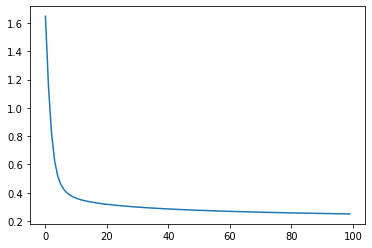

In [11]:
(W,b)=neurone(X,y) #Train model

In [12]:
#All seems correct ,error is converging to ~0.3

In [13]:
W #Verify W

array([[ 1.07049548],
       [-1.12931855]])

In [14]:
b #Verify bias

array([1.03630605])

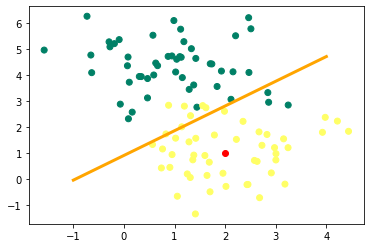

In [15]:
#Create test plant (the red one),and plot it with dataSet
test_plant=np.array([2,1])
x0 =np.linspace(-1,4,100) #decision boundary 1st paramaetre
x1=(-W[0]*x0-b)/W[1] #decision boundary 2nd paramaetre
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(test_plant[0],test_plant[1],c='r')
plt.plot(x0,x1,c='orange',lw=3)#line width
plt.show()

In [16]:
#Predict test_plant class
predict(test_plant,W,b)

[0.88574319]


array([ True])

In [17]:
#predition is correct,test_plant is toxic
#test_plant has  88.1 percent chance to be toxic

In [27]:
#3D implementation with plotly
import plotly.graph_objects as go
fig=go.Figure(data=[go.Scatter3d(
x=X[:,0].flatten(),
y=X[:,1].flatten(),
z=y.flatten(),
mode='markers',
marker=dict(
size=5,
color=y.flatten(),
colorscale='YlGn',
opacity=0.8,
reversescale=True)
)])

In [31]:
fig.update_layout(template="plotly_dark",margin=dict(l=0,r=0,b=0,t=0))
fig.layout.scene.camera.projection.type="orthographic"
fig.show()

In [42]:
#Decision boundary 3D preview with plotly
X0=np.linspace(X[:,0].min(),X[:,0].max(),100)
X1=np.linspace(X[:,1].min(),X[:,1].max(),100)
xx0,xx1=np.meshgrid(X0,X1)
Z=W[0]*xx0+W[1]*xx1+b
A=1/(1+np.exp(-Z))
fig=(go.Figure(data=[go.Surface(z=A,x=xx0,y=xx1,colorscale='YlGn',opacity=0.7,reversescale=True)]))
fig.add_scatter3d(
x=X[:,0].flatten(),
y=X[:,1].flatten(),
z=y.flatten(),
mode='markers',
marker=dict(size=5,color=y.flatten(),colorscale='YlGn',opacity=0.8,reversescale=True))

fig.update_layout(template="plotly_dark",margin=dict(l=0,r=0,b=0,t=0))
fig.layout.scene.camera.projection.type="orthographic"
fig.show()